# Математика для машинного обучения
## Домашнее задание №2

_Автор задания: Илья Щуров_

Подготовлено для программы «[Практический анализ данных и машинное обучение](https://cs.hse.ru/dpo/bigml)» (ФКН НИУ ВШЭ).

Задание выполнил(а): *Логин Виктор Павлович*

## Статистика
### Описательные статистики
Для выборки $x_1, x_2, \ldots, x_n$ определены следующие величины (они часто называются *описательными статистиками*):

1. Выборочное среднее: $$\bar x = \frac{x_1 + x_2 + \ldots + x_n}{n}.$$
2. Выборочная дисперсия: $$\sigma^2 = \frac{(x_1-\bar x)^2 + (x_2 - \bar x)^2 + \ldots + (x_n - \bar x)^2}{n}.$$
3. Исправленная выборочная дисперсия: $$\sigma_+^2 = \frac{(x_1-\bar x)^2 + (x_2 - \bar x)^2 + \ldots + (x_n - \bar x)^2}{n - 1}.$$
4. Выборочное стандартное отклонение: квадратный корень из выборочной дисперсии (обозначается $\sigma$ или $SD$).
5. Исправленное выборочное стандартное отклонение: квадратный корень из исправленной выборочной дисперсии (обозначается $\sigma_+$ или $SD_+$ или ещё как-нибудь).
6. [Медиана](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%B4%D0%B8%D0%B0%D0%BD%D0%B0_(%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0%29).

### Задача 1
Для выборки $\{1, 10, 2, 15, 100\}$ найти все характеристики, перечисленные выше.

Подсказка: можно использовать функции `np.mean`, `np.var`, `np.std`, `np.median`. Для вычисления исправленной выборочной дисперсии и исправленного выборочного стандартного отклонения необходимо соответствующим функциям передать параметр `ddof=1`.

In [17]:
import numpy as np

M = [ 1, 10, 2, 15, 100 ]


# 1. Выборочное среднее
print('mean', np.mean(M))

# 2. Выборочная дисперсия
print('var', np.var(M))

# 3. Исправленная выборочная дисперсия
print('var', np.var(M, ddof=1))

# 4. Выборочное стандартное отклонение
print('std', np.std(M))

# 5. Исправленное выборочное стандартное отклонение
print('std', np.std(M, ddof=1))

# 6. Медиана
print('median', np.median(M))


mean 25.6
var 1410.64
var 1763.3
std 37.5584877225
std 41.9916658398
median 10.0


### Задача 2

Кракозяблики бывают двух типов — левые и правые. Для решения задачи распознавания типа кракозяблика по его фотографии раньше использовали алгоритм *QZD*. Он давал точность (accuracy) в 67%. Новый алгоритм *EQZD* был запущен 10 раз на разных датасетах и показал следующие accuracy: 69%, 63%, 70%, 72%, 63%, 73%, 72%, 70%, 70%, 61%. Правда ли, что алгоритм *EQZD* лучше алгоритма *QZD* с точки зрения показателя accuracy? Используйте t-тест для проверки этого утверждения. Сформулируйте нулевую гипотезу и альтернативу. Для вычисления p-value используйте функцию `ttest_1samp` из пакета `scipy.stats`. Проинтерпретируйте полученное p-value.

In [45]:
# H0 - алгоритм EQZD не лучше QZD если <= 67%
# H1 - алгоритм EQZD лучше QZD если больше 67%

from scipy import stats

h = 0.67
rvs = [0.69, 0.63, 0.7, 0.72, 0.63, 0.73, 0.72, 0.7, 0.7, 0.61]

stats.ttest_1samp(rvs, 0)

Ttest_1sampResult(statistic=49.975609756097576, pvalue=2.5802218291887323e-12)

`p-value` > 5% - 

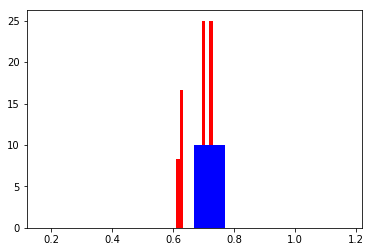

In [36]:
import matplotlib.pyplot as plt
plt.hist(rvs, normed=True, color='red');
plt.hist(h, normed=True, color='blue');

### Задача 3
Будем проводить следующий эксперимент: сгенерируем две различные независимые выборки размером `n = 5` из равномерного распределения на отрезке $[0, 1]$. С помощью теста Стьюдента проверим гипотезу о том, что эти две выборки были получены из распределений с различными средними ($H_0\colon m_1 = m_2$, $H_1\colon m_1 ≠ m_2$) на уровне значимости 5%.

Повторим этот эксперимент 10000 раз. Сколько раз мы будем совершать ошибку первого рода, то есть ошибочно отвергать нулевую гипотезу? Что будет, если изменить уровень значимости (например, использовать уровень значимости 1%)? Что будет, если увеличить размер выборки до `n = 20`?

Для генерирования выборок можно использовать `uniform.rvs`, для двухвыборочного теста Стьюдента — `ttest_ind` (обе функции из пакета `scipy.stats`). Последняя функция возвращает пару, состоящую из значения t-статистики и p-value.

In [8]:
# впишите решение сюда

### Задача 4
Напомним, что для выборки $x=\{x_1, x_2, \ldots, x_n\}$, сгенерированной из некоторой генеральной совокупности $X$, $Z$-статистика вычисляется так:

$$
Z = \frac{\bar x - EX}{\sigma_X} \sqrt{n},
$$
где $EX$ — среднее по генеральной совокупности (или, что то же самое, математическое ожидание случайной величины $X$), $\sigma_X$ — стандартное отклонение по генеральной совокупности (или, что то же самое, стандартное отклонение случайной величины $X$), $n$ — число элементов в выборке, $\bar x = \frac{x_1 + \ldots + x_n}{n}$ — выборочное среднее.

Для статистических тестов использовать $Z$-статистику сложно, посольку мы обычно не знаем стандартного отклонения по генеральной совокупности $\sigma_X$. Зато мы можем вычислить исправленное выборочное стандартное отклонение $\sigma_+(x)$. Оно будет приближать $\sigma_X$. Если заменить в формуле для $Z$-статистики $\sigma_X$ на $\sigma_+(x)$, получится формула для t-статистики:

$$
t = \frac{\bar x - EX}{\sigma_+(x)} \sqrt{n},
$$

Распределение $t$-статистики не является нормальным (по крайней мере, при не слишком больших $n$), но также является известным.

Вычислите $t$-статистику для задачи 2 по указанной выше формуле. (В качестве $EX$ необходимо подставить значение в 67%, оно берётся из нулевой гипотезы.) Убедитесь, что оно совпадает со значением, которое выдаёт функция `ttest_1samp`.

In [18]:
# впишите решение сюда